In [12]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt
#%matplotlib notebook ## for an interactive plot, change 'inline' -> 'notebook'
import time
import matplotlib.colors as col

In [19]:
## for changing the background color to black
#plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black' 


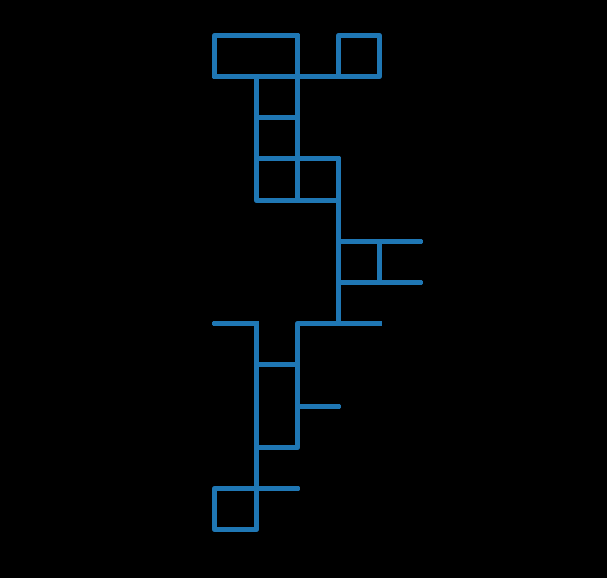

In [258]:
## Following is a simple random walk problem in x-y co-ordinate system. The particle starts at origin 
## and moves randomly in any of the 4 directions (for dr=4). This also gives rise to the Brownian motion.
## The probabilities of certain directions can be increases to create a biased random walk or certain choices can be removed
## to propel the particle to go in the same direction for a longer duration

## np.choice selects a number randomly from a given array
## np.delete deletes certain indices from an array

N_step=100                         # number of time steps for the random walk
del_step=0.1                       # size of each step
dr=4                               #specifying the number of direction, dr=4: square lattice, dr=6: hexagonal lattice
plt.figure(figsize=(10,10))        #figure size

L=np.exp(1j*np.linspace(0,2*np.pi,dr+1))[:-1]   #creating complex numbers for specifying each direction as the roots of unity
Z= np.zeros(N_step,dtype='complex128')          #noting the co-ordinates as real and imaginary parts of a complex number
Z[0]=0                                          #origin at x=0 y=0
k=0                                             #the index which determines which direction is chosen
for i in range(1, N_step):
    #a = np.random.randint(0, dir) 
    #a=np.random.choice(a=np.delete(np.arange(M),[(k-2)%M,(k+2)%M]))
    a=np.random.choice(a=np.delete(np.arange(dr),[]))    #the index which determines the next direction dpendent of the last direction
    k=a                                     
    Z[i]=Z[i-1]+del_step*L[a]                            # the random walk part
plt.plot(Z.real, Z.imag,linewidth=5)             #plotting with thick linewidth   
plt.axis('equal')                                #explicitly specifying that the axes should be equal in proportion
plt.axis('off')                                  #turning the visibility of x-y axes to 'off'

plt.show()                                       ## finally, showing the graph
 

In [253]:
## the following is an animation of the RW with an interactive JS

plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
from IPython.display import clear_output

fig, ax = plt.subplots()
l, = ax.plot([-1,1],[-1,1])
plt.show()
clear_output()
#print(t)
#animate = lambda i: l.set_data(t[i-2:i], x[i-2:i])
animate = lambda i: l.set_data(Z.real[:i], Z.imag[:i])
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(Z))
ani

In [260]:
#help(np.random.choice) ## use this to read documentation about any function

In [7]:
import numpy as np
N_list=10
N_step=10**4
del_theta=1                     ##step size for angle
del_r=1                           ##step size for radius



Z= 0+0*1j
HH=np.zeros((2,10**5))
pr_list=np.linspace(0.1,0.25,N_list)
pth_list=np.linspace(0.1,0.25,N_list)

j=0
for pr in pr_list:
    for pth in pth_list:
        theta=0
        r=0
        op('table1')[0,j]=Z.real
        op('table1')[1,j]=Z.imag
        j+=1

        for i in range(1, N_step):

            np.random.seed(parent().par.Seed.eval())
            k_r=np.random.choice(a=np.arange(3)-1,p=[pr,pr,1-2*pr])     ## biased RW to throu the particle in one direction
            k_theta=np.random.choice(a=np.arange(3)-1,p=[pth,pth,1-2*pth]) ## biased RW to make a spiral structure
            r+=del_r*k_r
            theta+=del_theta*k_theta
            Z=r*np.exp(1j*theta)
            op('table1')[0,j]=Z.real
            op('table1')[1,j]=Z.imag
            j+=1


In [7]:
from matplotlib import colors
color_list_gold_1=['#FFE964','#BA7322','#FFDC6D','#FFFFB5','#FCFDF6','#FFFF9C','#FDDC53','#D49721','#BB6E03','#5B1F03']
color_list_gold_cyclic=['#FFE964','#BA7322','#FFDC6D','#FFFFB5','#FCFDF6','#FFFF9C','#FDDC53','#D49721','#BB6E03','#5B1F03','#BB6E03','#D49721','#FDDC53','#FFFF9C','#FCFDF6','#FFFFB5','#FFDC6D','#BA7322','#FFE964']
color_list_gold_2=['#FFE964','#BA7322','#8B3E04','#FFDC6D','#FFFFB5','#FCFDF6','#FFFF9C','#FDDC53','#D49721','#BB6E03','#5B1F03']
norm=plt.Normalize(-2,2)
gold_1 = colors.LinearSegmentedColormap.from_list("", color_list_gold_1)
gold_2 = colors.LinearSegmentedColormap.from_list("", color_list_gold_2)

gold_cyclic = colors.LinearSegmentedColormap.from_list("", color_list_gold_cyclic)


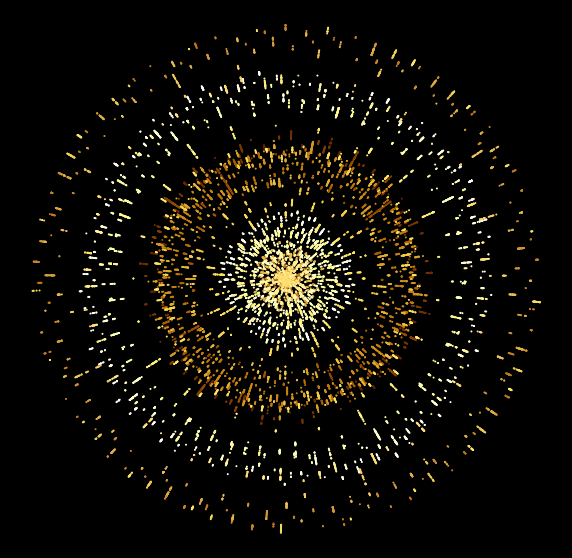

In [147]:
## Random walk, but in polar co-ordinates.
## Also the random walk in r and theta axes are completely independent (unlike the x-y co-ordinate system)
N_step=2*10**4
plt.figure(figsize=(10,10))
r=np.zeros(N_step)
theta=np.zeros(N_step)
Z= np.zeros(N_step,dtype='complex128')
Z[0]=0
theta=0
r=0
np.random.seed(0)

del_theta=0.1*15                   ##step size for angle
del_r=1                           ##step size for radius
for i in range(1, N_step):
    k_r=np.random.choice(a=np.arange(3)-1,p=[0.2,0.6,0.2])     ## biased RW to throu the particle in one direction
    k_theta=np.random.choice(a=np.arange(3)-1,p=[0.3,0.5,0.2]) ## biased RW to make a spiral structure
    r+=del_r*k_r
    theta+=del_theta*k_theta
    Z[i]=1*r*np.exp(1j*theta)
plt.scatter(Z.real,Z.imag,s=1,c=np.linspace(0,1,N_step),alpha=1,cmap=gold_cyclic)                        ##scatter plot the point.  's' specifies the markersize
#plt.scatter(Z.real,Z.imag,s=1,c='w',alpha=1)                        ##scatter plot the point.  's' specifies the markersize
plt.axis('equal')
plt.axis('off')
plt.show()

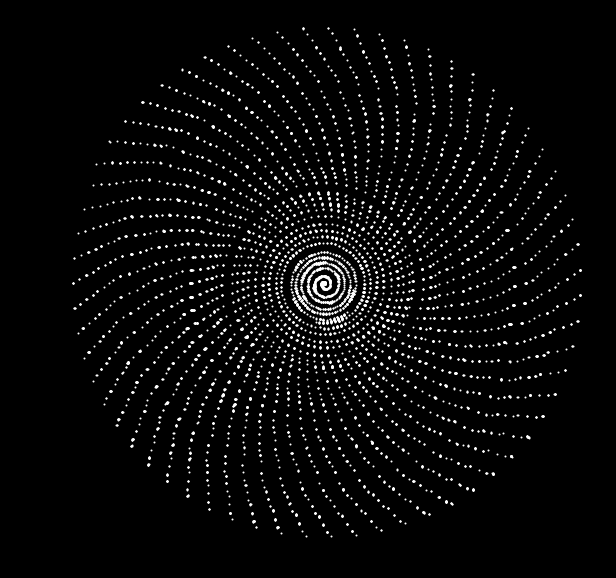

In [263]:
## Random walk, but in polar co-ordinates.
## Also the random walk in r and theta axes are completely independent (unlike the x-y co-ordinate system)

N_step=10**4
del_theta=1/10                    ##step size for angle
del_r=1                           ##step size for radius
plt.figure(figsize=(10,10))

r=np.zeros(N_step)
theta=np.zeros(N_step)
Z= np.zeros(N_step,dtype='complex128')
Z[0]=0
theta=0
r=0
np.random.seed(0)
for i in range(1, N_step):
    
    k_r=np.random.choice(a=np.arange(3)-1,p=[0.25,0.25,0.5])     ## biased RW to throu the particle in one direction
    k_theta=np.random.choice(a=np.arange(3)-1,p=[0.25,0.25,0.5]) ## biased RW to make a spiral structure
    #b=a
    r+=del_r*k_r
    theta+=del_theta*k_theta
    Z[i]=1*r*np.exp(1j*theta)
    

plt.scatter(Z.real,Z.imag,s=1,color='w')                        ##scatter plot the point.  's' specifies the markersize
plt.axis('equal')
plt.axis('off')

plt.show()

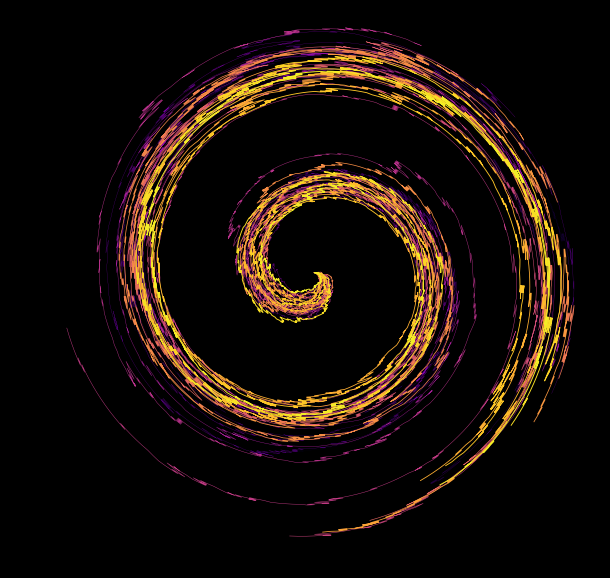

In [272]:
## Multiple Random Walks at once


N_step=1000
N_spir=100//3
del_theta=np.pi/100
del_r=1
plt.figure(figsize=(10,10))
Z= np.zeros((N_step,N_spir),dtype='complex128')
r=np.zeros(N_spir)
theta=np.zeros(N_spir)

s=0
for i in range(1, N_step):
    #np.random.seed()
    #a=np.random.choice(a=2*np.arange(2)-1,p=[0.4,0.6],size=N_spir)
    #b=np.random.choice(a=2*np.arange(2)-1,p=[0.3,0.7],size=N_spir)
    a=np.random.choice(a=np.arange(3)-1,p=[0.2,0,0.8],size=N_spir)
    b=np.random.choice(a=np.arange(3)-1,p=[0.7,0,0.3],size=N_spir)

    #b=a
    #print(b)
    r=r+del_r*a
    theta=theta+del_theta*b
    Z[i]=r*np.exp(1j*theta)

X=Z.real.T
SX=np.sign(X)
Y=Z.imag.T
SY=np.sign(Y)
cmap=plt.get_cmap("plasma")
for i in range(N_spir):
    g=i/N_spir
    #plt.plot(SX[i]*X[i]**2, SY[i]*Y[i]**2,color=(g,0,0,1),linewidth=1,alpha=1)
    plt.plot(X[i], Y[i],color=cmap(g),linewidth=g**1)
    #plt.plot(X[i], Y[i],'.',color='r',markersize=2*g,alpha=0.9)
plt.axis('equal')
plt.axis('off')

plt.show()


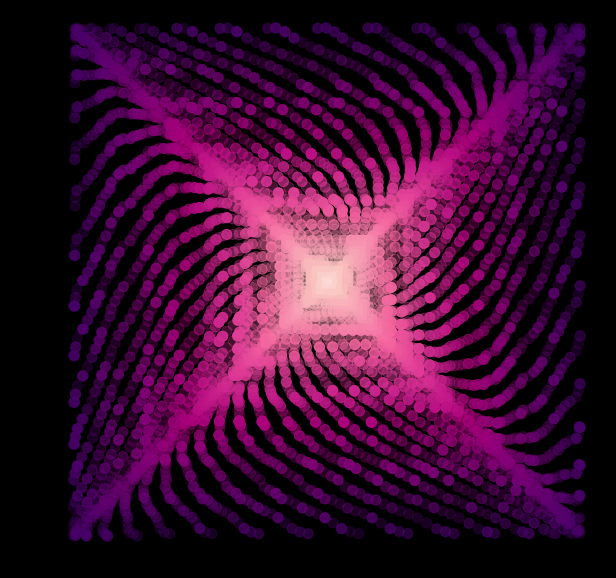

In [193]:
## RW in polar co-ordinates and again transforming it into x-y co-ordinate system to produce a square spiral


N_step=10**4
del_theta=1/10
del_r=1
plt.figure(figsize=(10,10))

r=np.zeros(N_step)
theta=np.zeros(N_step)
X=np.zeros(N_step)
Y=np.zeros(N_step)
theta[0]=0
r[0]=0
for i in range(1, N_step):
    np.random.seed()
    k_r=np.random.choice(a=np.arange(3)-1,p=[0.4,0,0.6])
    k_theta=np.random.choice(a=np.arange(3)-1,p=[0.3,0,0.7])
    #b=a
    r[i]=r[i-1]+del_r*k_r
    theta[i]=theta[i-1]+del_theta*k_theta

C_theta=np.cos(theta)
S_theta=np.sin(theta)

## We have to use signum function to produce an efficient continuos co-ordinate transformation 

Sgn_S=np.sign(S_theta)
Sgn_C=np.sign(C_theta)
cmap = col.LinearSegmentedColormap.from_list("", ["c","m","y","k"])
#exp=1+r/np.max(r)                 ## continuos co-ordinate transformation from polar to x-y co-ordiantes
exp=2                              ## x-y co-ordinate system final plot
#exp=1                             ## polar co-ordinate system final plot
X=r*(np.abs(S_theta)**exp)*(Sgn_S)
Y=r*(np.abs(C_theta)**exp)*(Sgn_C)
X1=(X+Y)/(2**0.5)                  ##rotating the x-y co-ordiante system at 45 degrees
Y1=(X-Y)/(2**0.5)
plt.scatter(X1,Y1,s=100,c=r**0.5,alpha=0.3,cmap='RdPu') ## alpha -> transparecy, c -> color
plt.axis('equal')
plt.axis('off')

plt.show()
 

In [234]:
def RW_sphere(N_step,del_r,del_theta,del_phi,p_r,p_theta,p_phi):
    t_0=time.clock()

    r=np.zeros(N_step)
    theta=np.zeros(N_step)
    phi=np.zeros(N_step)
    

    for i in range(1, N_step):
        k_r=np.random.choice(a=np.arange(3)-1,p=p_r)
        k_theta=np.random.choice(a=np.arange(3)-1,p=p_theta)
        k_phi=np.random.choice(a=np.arange(3)-1,p=p_phi)
        r[i]=r[i-1]+del_r*k_r
        theta[i]=theta[i-1]+del_theta*k_theta
        phi[i]=phi[i-1]+del_phi*k_phi

    X=r*np.sin(phi)*np.cos(theta)
    Y=r*np.sin(phi)*np.sin(theta)
    Z=r*np.cos(phi)
    t=time.clock()-t_0
    #return X,Y,Z,t
    return X,Y,Z

def RW_polar(N_step,del_theta,del_r,p_r,p_theta):
    r=np.zeros(N_step)
    theta=np.zeros(N_step)
    for i in range(1, N_step):
        np.random.seed()
        k_r=np.random.choice(a=2*np.arange(2)-1,p=[p_r,1-p_r])
        k_theta=np.random.choice(a=2*np.arange(2)-1,p=[p_theta,1-p_theta])
        #b=a
        r[i]=r[i-1]+del_r*k_r
        theta[i]=theta[i-1]+del_theta*k_theta
    Z=r*np.exp(1j*theta)
    return Z

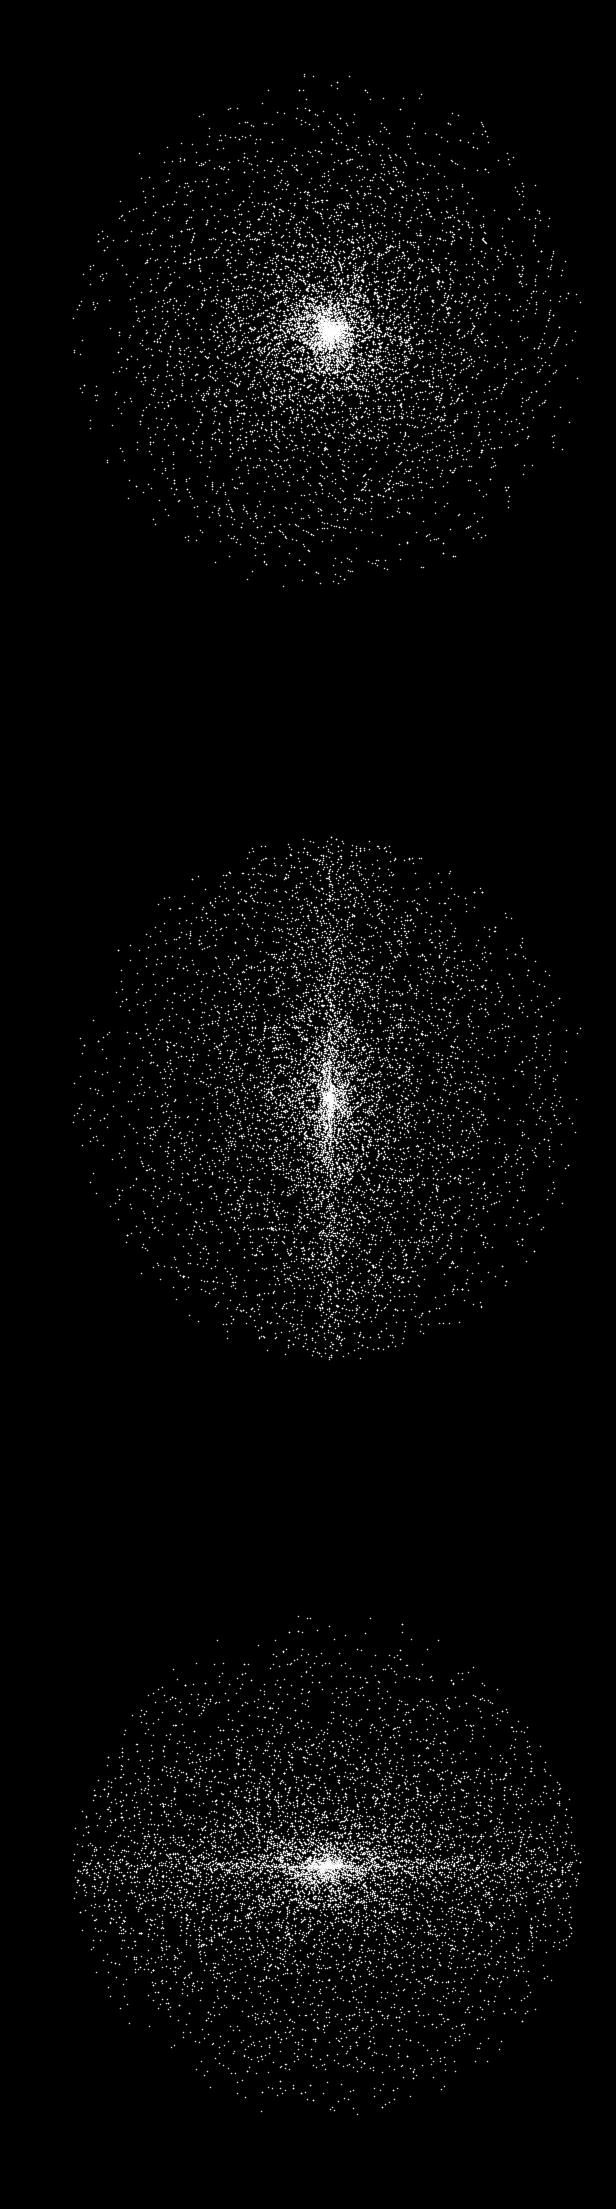

In [237]:
## Random walk in 3-D spherical co-ordinate system and its projection on the 3 planes


del_r=1
del_theta=1
del_phi=1
p_r=[0.9,0,0.1]
p_theta=[0.2,0,0.8]
p_phi=[0.2,0,0.8]
N_step=10**4
plt.figure(figsize=(10,40))

X,Y,Z=RW_sphere(N_step,del_r,del_theta,del_phi,p_r,p_theta,p_phi)
plt.subplot(311)
plt.plot(X,Y,'.',markersize=1,color='w')
plt.axis('off')
plt.axis('equal')
plt.subplot(312)
plt.plot(X,Z,'.','.',markersize=1,color='w')
plt.axis('off')
plt.axis('equal')
plt.subplot(313)
plt.plot(Z,Y,'.','.',markersize=1,color='w')
plt.axis('off')
plt.axis('equal')
plt.show()

In [ ]:
## Saving the RW simulations in npz files

N_step=10**3
Z=np.zeros((4,4,4,N_step))*1j
p_r_list=np.logspace(-1,0,4)
p_theta_list=np.logspace(-1,0,4)
del_theta_list=np.logspace(-1,1,4)
file='D:/edushiz/generative/data/RW_polar_N_Step={0}.npz'.format(N_step)
t_0=time.clock()
for i,del_theta in enumerate(del_theta_list):
    for j,p_r in enumerate(p_r_list):
        for k,p_theta in enumerate(p_theta_list):
            Z[i][j][k]=RW_polar(N_step,del_theta,del_r,p_r,p_theta)
            print(i,j,k)
t_f=time.clock()-t_0
np.savez_compressed(file,Z=Z,time=t_f,p_r_list=p_r_list,p_theta_list=p_theta_list,del_theta_list=del_theta_list)

In [ ]:
## plotting the saved RW simulations

N_step=10**3
file='D:/edushiz/generative/data/RW_polar_N_Step={0}.npz'.format(N_step)
T=[]
T=np.load(file)
Z=T['Z']
p_r_list=np.logspace(-1,0,4)
p_theta_list=np.logspace(-1,0,4)
del_theta_list=np.logspace(-2,0,4)
for i,del_theta in enumerate(del_theta_list):
    plt.figure(figsize=(40,40))
    m=1
    for j in range(4):
        for k in range(4):
            plt.subplot(4,4,m)
            #plt.plot(np.arange(5))
            plt.plot(Z[i][j][k].real,Z[i][j][k].imag,'.',markersize=2,color='w')
            m+=1
    plt.title('$\Delta_\theta={0}$'.format(del_theta))
    plt.axis('equal')
    plt.axis('off')
    plt.savefig('RW_polar_N_step={0}_del_theta={1}.png'.format(N_step,del_theta), bbox_inches='tight')
    plt.axis('off')
    plt.show()


In [ ]:
## time analysis with number of steps done for RW in spherical co-ordinates

del_r=1
del_theta=1
del_phi=1
p_r=[0.33,0.34,0.33]
p_theta=[0.33,0.34,0.33]
p_phi=[0.33,0.34,0.33]
N_step_list=10**np.arange(3,6)
l=len(N_step_list)
t_list=np.zeros(l)
for i in range(l):
    X,Y,Z,t=RW_sphere(N_step_list[i],del_r,del_theta,del_phi,p_r,p_theta,p_phi)
    t_list[i]=t
    
plt.plot(t_list)